In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style="whitegrid")


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

C:\Users\wakanda\AppData\Local\conda\conda\envs\chatbot\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv(r"C:\Users\wakanda\Documents\Resources\DATASETS\german-credit-risk\german_credit_data.csv")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
data.shape

(1000, 11)

##### the unamed column is a replica of the index column so it should be dropped

In [4]:
data.drop(["Unnamed: 0"], axis=1, inplace = True)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


###### Overall summary of the data of continous variables

from the dataset we can see the average age of the loan applicants is 35 years with a standard deciation of 11 years, 
the youngest applicant is 19 years old.

On average the applicant work 2 jobs, probably indicating low income earners, this thesis can be validated by analysis
of the account information

In [5]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [6]:
data.isnull().sum()/data.shape[0]

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

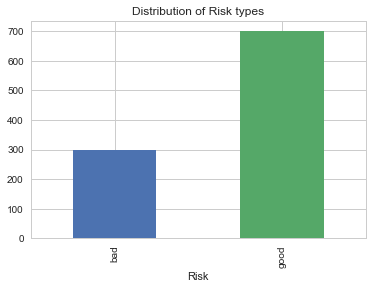

In [7]:
groupby_user = data.groupby('Risk').size()
groupby_user.plot.bar(title = 'Distribution of Risk types')

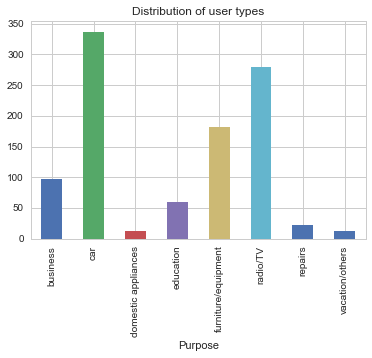

In [8]:
groupby_user = data.groupby('Purpose').size()
groupby_user.plot.bar(title = 'Distribution of user types')

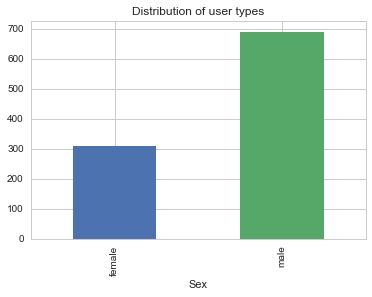

In [9]:
groupby_user = data.groupby('Sex').size()
groupby_user.plot.bar(title = 'Distribution of user types')

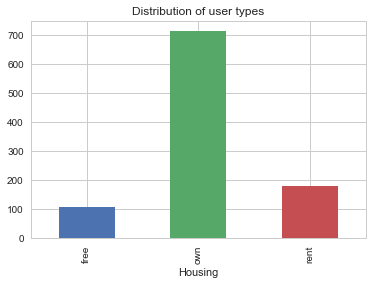

In [10]:
groupby_user = data.groupby('Housing').size()
groupby_user.plot.bar(title = 'Distribution of user types')

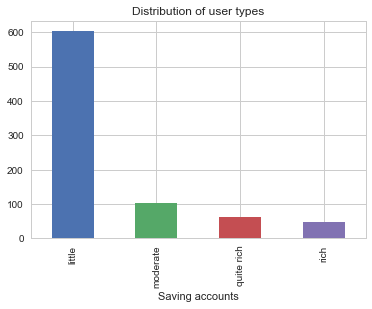

In [11]:
groupby_user = data.groupby('Saving accounts').size()
groupby_user.plot.bar(title = 'Distribution of user types')

In [12]:
print("Distinct number of Saving accounts :", len(data["Saving accounts"].unique()))
print("Distinct number of Checking account :", len(data["Checking account"].unique()))
print("Average Credit amount : ",round(data["Credit amount"].mean(),2))

Distinct number of Saving accounts : 5
Distinct number of Checking account : 4
Average Credit amount :  3271.26


In [13]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

##### Create histograms to study Age and credit amont variables

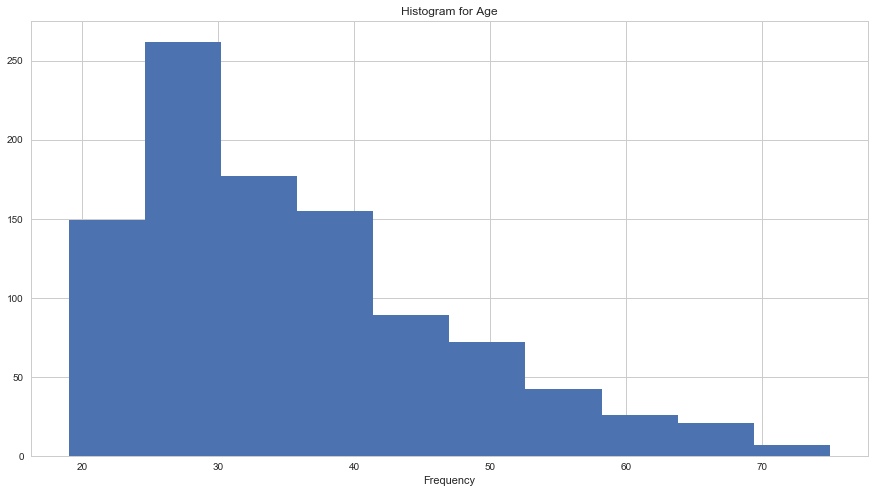

In [14]:
plt.figure(figsize=(15,8))
plt.hist(data["Age"])
plt.title("Histogram for Age")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

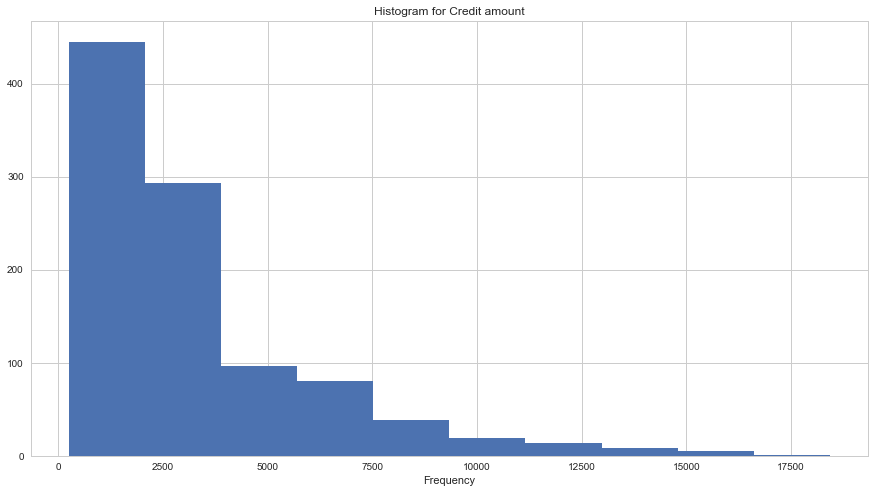

In [15]:
plt.figure(figsize=(15,8))
plt.hist(data["Credit amount"])
plt.title("Histogram for Credit amount")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B80EBC3630>,
      dtype=object)

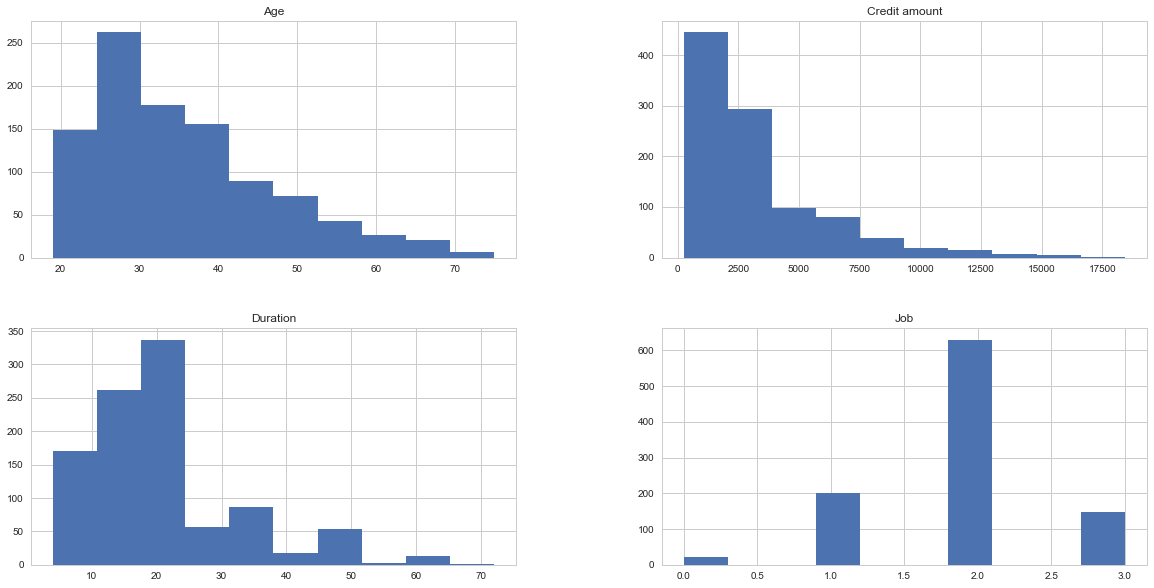

In [16]:
data.hist(figsize=(20,10))

##### Check percentage of missing values

Checking account has a lot of missing values might have to drop it

In [17]:
data.isnull().sum()/data.shape[0] * 100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

In [18]:
#Replace nulls with the mode
data["Saving accounts"]=data["Saving accounts"].fillna(data["Saving accounts"].mode()[0])
# data["Checking account"]=data["Checking account"].fillna(data["Checking account"].mode()[0])

In [19]:
# #drop Checking account missing rows
# data.drop("Checking account")

##### Explore Categorical Variables

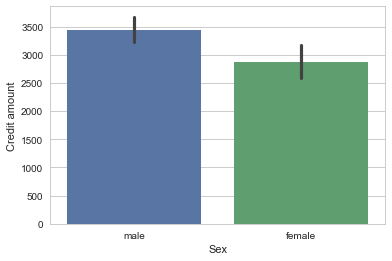

In [20]:
#Create the bar plot for Average Loan requests across Sexes
ax = sns.barplot(x="Sex", y="Credit amount", data=data)

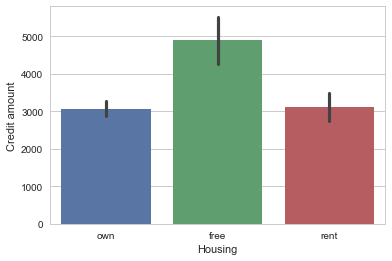

In [21]:
#Create the bar plot for Average Loan requests across Housing strata
ax = sns.barplot(x="Housing", y="Credit amount", data=data)

###### Create categorical variable from Age

In [22]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
data["Age"] = pd.cut(data.Age, interval, labels=cats)

###### One hot encode categorical Variable

In [23]:
categorical_columns = ["Age","Sex", "Housing", "Saving accounts",  "Purpose"]
numeric_columns = ["Job", "Credit amount" , "Duration"]

In [24]:
def create_ohe(df, col):
    """Function that will takes the raw dataframe and the
       column name and return a one hot encoded DF
    """
    le = LabelEncoder()
    a=le.fit_transform(data[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [25]:
#We create a loop to create the final dataset with all features
temp = data[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(data,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [26]:
data["Risk"] = data["Risk"].map({"good":1, "bad":0})

In [27]:
data.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,Senior,male,2,own,little,little,1169,6,radio/TV,1


##### Create train and test dataset with an 80:20 split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(temp, data["Risk"], test_size=0.2,random_state=2019)

In [29]:
#Design the deep neural network [Small + 1 layer]
model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,validation_data =(x_test, y_test), epochs=3, batch_size=64)

Train on 800 samples, validate on 200 samples
Epoch 1/3
800/800 [==============================] - 0s 330us/step - loss: 5.1217 - acc: 0.6713 - val_loss: 5.0219 - val_acc: 0.6850
Epoch 2/3
800/800 [==============================] - 0s 152us/step - loss: 4.7229 - acc: 0.7037 - val_loss: 5.0219 - val_acc: 0.6850
Epoch 3/3
800/800 [==============================] - 0s 131us/step - loss: 4.7229 - acc: 0.7037 - val_loss: 5.0219 - val_acc: 0.6850


In [30]:
result = model.evaluate(x_test, y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

200/200 [==============================] - 0s 143us/step
Metric  loss : 5.02
Metric  acc : 0.68


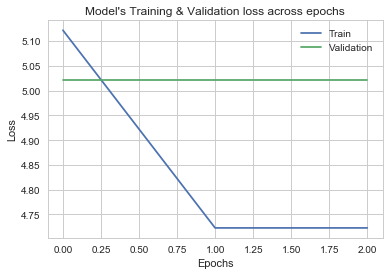

In [31]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [32]:
# evaluate the model
scores = model.evaluate(x_train,y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 70.38%


In [33]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("Saved model to disk")

Saved model to disk
